Understanding Collider Bias in Causal Inference
Collider bias occurs in causal inference when controlling for a variable (a collider) that is influenced by at least two other variables, creating a spurious association between those variables. In your hypothetical study examining the relationship between stress, smoking, and heart disease, smoking can act as a collider.

Scenario: Stress, Smoking, and Heart Disease
Variables:
Stress: Can lead individuals to smoke more.
Smoking: Increases the risk of heart disease.
Heart Disease: The outcome we are interested in.
In this scenario, stress and heart disease may not have a direct causal relationship. However, because both stress and heart disease can independently lead to increased smoking, smoking becomes a collider in the pathway between stress and heart disease.

Why Controlling for Smoking Can Mislead
If you control for smoking, you may inadvertently introduce a spurious relationship between stress and heart disease. This occurs because:

Controlling for smoking blocks the pathway through which stress affects heart disease via increased smoking (a direct effect of stress).
It also opens a non-causal pathway between stress and heart disease that operates through a shared effect on smoking. In essence, you may observe an artificial association between stress and heart disease that is mediated through their common effect on smoking.
Identifying and Mitigating Collider Bias
Identify Potential Colliders:
Examine your causal diagram or model for variables influenced by more than one other variable.
In your case, determine whether adjusting for smoking actually changes the association between stress and heart disease.
Avoid Adjusting for Colliders:
Do not control for smoking when examining the direct effects of stress on heart disease unless specifically interested in pathways not mediated by smoking.
Use Alternative Statistical Techniques:
Techniques like stratification or multivariable models can sometimes help, but they require careful consideration of the underlying causal structure.
Instrumental variable analysis or path analysis might also be useful to explore complex relationships and indirect paths without introducing bias.
Sensitivity Analysis:
Perform sensitivity analysis to understand how robust your findings are to the inclusion or exclusion of potential colliders.
Consult Extant Literature:
Compare your findings with existing research to see if similar biases have been reported and how they were handled.

Correlation matrix before controlling for Smoking:
                 Stress   Smoking  HeartDisease
Stress        1.000000  0.448654      0.229004
Smoking       0.448654  1.000000      0.494273
HeartDisease  0.229004  0.494273      1.000000
Regression results without controlling for Smoking:
                             OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     553.3
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          3.91e-119
Time:                        20:01:19   Log-Likelihood:                -15311.
No. Observations:               10000   AIC:                         3.063e+04
Df Residuals:                    9998   BIC:                         3.064e+04
Df Model:                           1                                      

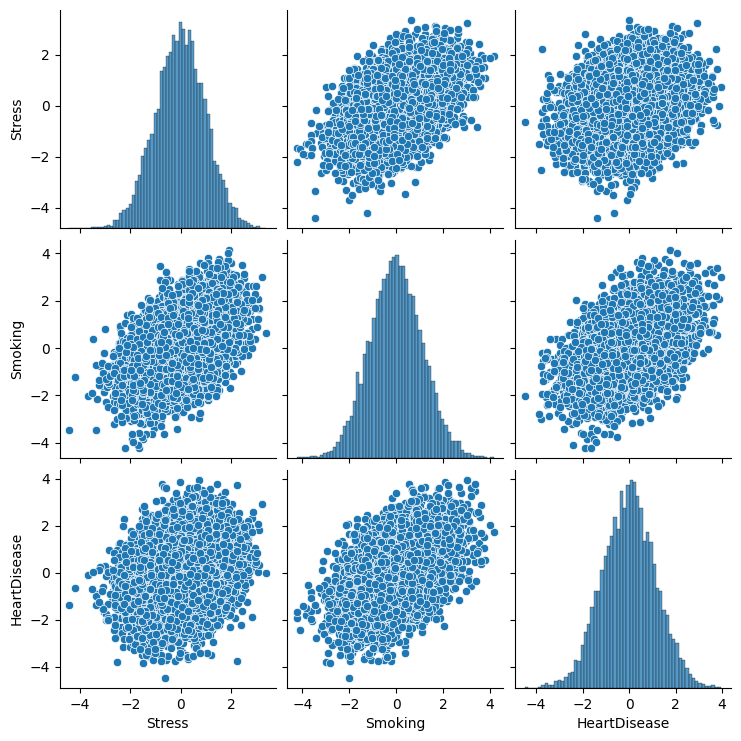

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(73)
n = 10000
stress = np.random.normal(0, 1, n)
smoking = 0.5*stress + np.random.normal(0, 1, n)
heart_disease = 0.5*smoking + np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({'Stress': stress, 'Smoking': smoking, 'HeartDisease': heart_disease})

# Correlation matrix before controlling for Smoking
correlation_matrix_before = df.corr()
print("Correlation matrix before controlling for Smoking:\n", correlation_matrix_before)

# Regression without controlling for Smoking
model = sm.OLS(df['HeartDisease'], sm.add_constant(df[['Stress']]))
results = model.fit()
print("Regression results without controlling for Smoking:\n", results.summary())

# Regression with controlling for Smoking
model_control = sm.OLS(df['HeartDisease'], sm.add_constant(df[['Stress', 'Smoking']]))
results_control = model_control.fit()
print("Regression results with controlling for Smoking:\n", results_control.summary())

# Visualize data
sns.pairplot(df)
plt.show()


Interpretation of Results:
Correlation Matrix Before Controlling for Smoking:
Stress has a moderate positive correlation with smoking (r = 0.448), which suggests that higher stress levels might be associated with increased smoking.
Smoking has a stronger positive correlation with heart disease (r = 0.494), indicating a potential causal link as per common medical knowledge.
Stress has a weaker positive correlation with heart disease (r = 0.229), which could imply a direct or indirect relationship.
Regression Results Without Controlling for Smoking:
The regression without controlling for smoking shows a positive association between stress and heart disease (coefficient = 0.2649). The R-squared value is 0.052, which means that stress alone accounts for 5.2% of the variance in heart disease.
Regression Results With Controlling for Smoking:
When controlling for smoking, the association between stress and heart disease dramatically decreases (coefficient = 0.0105), and it is not statistically significant (p = 0.351). This suggests that the original relationship between stress and heart disease was confounded by smoking.
The R-squared value jumps to 0.244 when smoking is included, meaning smoking explains a substantial part of the variance in heart disease (24.4%).
Collider Bias Interpretation:
The initial model suggested a possible direct link between stress and heart disease. However, once we control for smoking (which is a collider here), the relationship between stress and heart disease is diminished. This might indicate that the original observed relationship was partly due to the influence of stress and heart disease on smoking habits.

Controlling for smoking introduces collider bias, making it seem like stress is not related to heart disease when it may actually be (through a pathway that involves smoking). This is why controlling for a collider can lead to incorrect causal inferences, as it distorts the actual relationships between the variables involved.